# Descripción del proyecto
El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. 

Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

# Objetivo:  
Identificar los operadores menos eficaces.

# Etapas 
 
El proyecto consistirá en 4 etapas:
 1. Lleva a cabo el análisis exploratorio de datos
 2. Identificar operadores ineficaces
 3. Prueba las hipótesis estadísticas
 4. Entregar la conclusión general

# Descripción de los datos

El dataset comprimido `telecom_dataset_us.csv` contiene las siguientes columnas:

- `user_id`: ID de la cuenta de cliente
- `date`: fecha en la que se recuperaron las estadísticas
- `direction`: "dirección" de llamada (`out` para saliente, `in` para entrante)
- `internal`: si la llamada fue interna (entre los operadores de un cliente o clienta)
- `operator_id`: identificador del operador
- `is_missed_call`: si fue una llamada perdida
- `calls_count`: número de llamadas
- `call_duration`: duración de la llamada (sin incluir el tiempo de espera)
- `total_call_duration`: duración de la llamada (incluido el tiempo de espera)

 

El conjunto de datos `telecom_clients_us.csv` tiene las siguientes columnas:

- `user_id`: ID de usuario/a
- `tariff_plan`: tarifa actual de la clientela
- `date_start`: fecha de registro de la clientela



# Etapa 1 Lleva a cabo el análisis exploratorio de datos

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import scipy.stats as stats
import math as mth
from scipy import stats as st
import numpy as np
from scipy.stats import ttest_1samp

In [ ]:
cliente = pd.read_csv("/content/telecom_clients_us.csv", parse_dates=['date_start'] )
data = pd.read_csv("/content/telecom_dataset_us.csv", parse_dates=['date'] )

## 1.2 Visualización de Datos 

# Cliente

In [ ]:
print(cliente.info())
print('-----------------------------------------------------------------------------------')
print('Datos duplicados',cliente.duplicated().sum())
print('-----------------------------------------------------------------------------------')
cliente.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB
None
-----------------------------------------------------------------------------------
Datos duplicados 0
-----------------------------------------------------------------------------------


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


# Data

In [ ]:
print(data.info())
print('-----------------------------------------------------------------------------------')
print('Datos duplicados',data.duplicated().sum())
print('-----------------------------------------------------------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              53902 non-null  int64                                
 1   date                 53902 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            53902 non-null  object                               
 3   internal             53785 non-null  object                               
 4   operator_id          45730 non-null  float64                              
 5   is_missed_call       53902 non-null  bool                                 
 6   calls_count          53902 non-null  int64                                
 7   call_duration        53902 non-null  int64                                
 8   total_call_duration  53902 non-null  int64                                
dtypes: bool

In [ ]:
data.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


## 1.2 Limpieza de Datos 

- **Estudiar valores ausentes**


In [ ]:
# Veamos la tabla filtrada con valores ausentes
data[data['operator_id'].isna()]

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
7,166377,2019-08-05 00:00:00+03:00,in,False,NaN,True,6,0,35
9,166377,2019-08-06 00:00:00+03:00,in,False,NaN,True,4,0,62
17,166377,2019-08-07 00:00:00+03:00,in,False,NaN,True,2,0,24
27,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0,34
...,...,...,...,...,...,...,...,...,...
53876,168601,2019-11-27 00:00:00+03:00,in,False,NaN,True,2,0,39
53880,168601,2019-11-28 00:00:00+03:00,in,False,NaN,True,1,0,19
53889,168603,2019-11-28 00:00:00+03:00,in,False,NaN,True,1,0,30
53893,168606,2019-11-08 00:00:00+03:00,in,False,NaN,True,6,0,121


In [ ]:
data.isnull().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

In [ ]:
porcentaje_datos_null = data.isnull().sum() / len(data) * 100
print(porcentaje_datos_null)

user_id                 0.000000
date                    0.000000
direction               0.000000
internal                0.217061
operator_id            15.160847
is_missed_call          0.000000
calls_count             0.000000
call_duration           0.000000
total_call_duration     0.000000
dtype: float64


In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45670 entries, 1 to 53900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              45670 non-null  int64                                
 1   date                 45670 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            45670 non-null  object                               
 3   internal             45670 non-null  object                               
 4   operator_id          45670 non-null  float64                              
 5   is_missed_call       45670 non-null  bool                                 
 6   calls_count          45670 non-null  int64                                
 7   call_duration        45670 non-null  int64                                
 8   total_call_duration  45670 non-null  int64                                
dtypes: bool

Se eliminan los datos NAN de la columna operator_id que es una columna principal para nuestro análisis

- **Estudiar valores duplicados**


In [ ]:
datos_duplicados = 4900
total_datos = 53902
resultado = round(datos_duplicados / total_datos * 100)
print(f'El porcentaje de participacion de numeros negativos dentro de la columna es {resultado}%')

El porcentaje de participacion de numeros negativos dentro de la columna es 9%


In [ ]:
# Eliminación de datos nulo
data = data.drop_duplicates().reset_index(drop= True)

In [ ]:
data.duplicated().sum()

0

Se eliminan los datos duplicados 

- **Comprobar la exactitud de los nombres de columnas**


In [ ]:
data.head(2)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
1,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1


- **Renombrar las columnas**


In [ ]:
data.columns = ['usuario', 'data', 'direction', 'interna', 'operador', 'llamada_perdida',	'numero_llamadas', 'duracion_llamada', 'duracion_llamada_total']
data.head(2)

,usuario,data,direction,interna,operador,llamada_perdida,numero_llamadas,duracion_llamada,duracion_llamada_total
0,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
1,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1


# Etapa 2 Identificar operadores ineficaces

## 2.1 Creación de filtros y variables para nuestro análisis

In [ ]:
data['session_date'] = data['data'].dt.date

In [ ]:
data['tiempo_espera'] = data['duracion_llamada_total'] - data['duracion_llamada']
data.head(2)

,usuario,data,direction,interna,operador,llamada_perdida,numero_llamadas,duracion_llamada,duracion_llamada_total,session_date,tiempo_espera
0,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,2019-08-05,5
1,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,2019-08-05,1


- **Número de llamadas perdidas por operador**

In [ ]:
data.head(2)

,usuario,data,direction,interna,operador,llamada_perdida,numero_llamadas,duracion_llamada,duracion_llamada_total,session_date,tiempo_espera
0,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,2019-08-05,5
1,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,2019-08-05,1


In [ ]:
llamadas_operador = data[data['llamada_perdida'] == True].groupby('operador')['llamada_perdida'].sum()
print(llamadas_operador)

operador
879896.0    47
879898.0    89
880020.0     6
880022.0    29
880026.0    87
            ..
972408.0     1
972410.0     2
972412.0     2
972460.0     3
973120.0     1
Name: llamada_perdida, Length: 876, dtype: int64


In [ ]:
llamadas_operador.describe()

count    876.000000
mean      16.106164
std       19.247890
min        1.000000
25%        2.750000
50%        9.000000
75%       22.000000
max      119.000000
Name: llamada_perdida, dtype: float64

In [ ]:
llamadas_operador_filtrado = llamadas_operador[llamadas_operador >22 ]
total_operadores = llamadas_operador_filtrado.count()
print(f"El total de operadores con más de 22 llamadas perdidas es: {total_operadores}")

El total de operadores con más de 22 llamadas perdidas es: 216


In [ ]:
# Filtrar operadores con más de 22 llamadas perdidas
operadores_malos = llamadas_operador[llamadas_operador > 22].index.tolist()

# Agregar columna indicando si el operador es bueno o malo
data = data.copy()
data['calidad_llamada'] = data['operador'].apply(lambda x: 'Malo' if x in operadores_malos else 'Bueno')

# Contabilizar cantidad de operadores malos y buenos
cantidad_operadores = data.groupby('calidad_llamada')['operador'].nunique()

# Restar operadores malos de los buenos
good = cantidad_operadores['Bueno'] - cantidad_operadores['Malo']

# Calcular porcentaje de datos
total = cantidad_operadores['Bueno'] + cantidad_operadores['Malo']
good_percent = good / total * 100
bad_percent = cantidad_operadores['Malo'] / total * 100

print("Cantidad de operadores buenos: ", good)
print("Cantidad de operadores malos: ", cantidad_operadores['Malo'])

Cantidad de operadores buenos:  660
Cantidad de operadores malos:  216


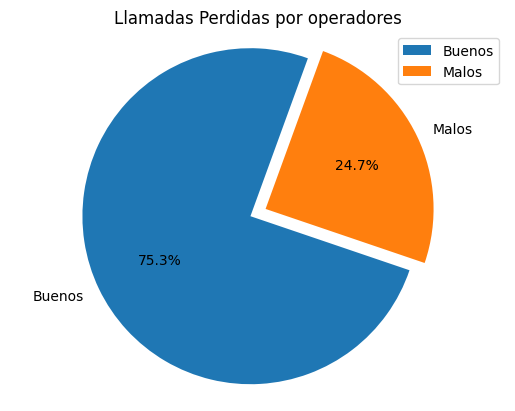

Cantidad de operadores buenos:  660 (75.3%)
Cantidad de operadores malos:  216 (24.7%)
Total de operadores:  876


In [ ]:
# Sumar cantidad de operadores buenos y malos
bad = cantidad_operadores['Malo']
# Calcular porcentajes de buenos y malos
good_pct = good / (good + bad) * 100
bad_pct = bad / (good + bad) * 100
# Crear gráfico de torta
labels = ['Buenos', 'Malos']
sizes = [good, bad]
colors = ['#1f77b4', '#ff7f0e']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=70, textprops={'color': 'black'})
plt.axis('equal')
plt.title('Llamadas Perdidas por operadores')
plt.legend()
plt.show();

# Imprimir totales
total = good + bad
print("Cantidad de operadores buenos: ", good, "({:.1f}%)".format(good_pct))
print("Cantidad de operadores malos: ", bad, "({:.1f}%)".format(bad_pct))
print("Total de operadores: ", total);

In [ ]:
data.head()

,usuario,data,direction,interna,operador,llamada_perdida,numero_llamadas,duracion_llamada,duracion_llamada_total,session_date,tiempo_espera,calidad_llamada
0,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,2019-08-05,5,Malo
1,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,2019-08-05,1,Bueno
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,2019-08-05,8,Bueno
3,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,2019-08-05,25,Malo
4,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,False,2,3,29,2019-08-05,26,Bueno


- **Llamadas salientes por operador** 

In [ ]:
out_calls = data.loc[data['direction'] == 'out', 'operador'].value_counts()
out_calls

901884.0    228
887276.0    198
901880.0    194
885876.0    193
891410.0    191
           ... 
906076.0      1
905862.0      1
966686.0      1
949420.0      1
930326.0      1
Name: operador, Length: 882, dtype: int64

In [ ]:
out_calls.describe()

count    882.000000
mean      32.667800
std       38.145841
min        1.000000
25%        5.000000
50%       19.000000
75%       45.000000
max      228.000000
Name: operador, dtype: float64

In [ ]:
less_than_5_calls = out_calls[out_calls < 5 ].count()
print(f"El total de operadores con menos de 5 llamadas salientes es: {less_than_5_calls}")

El total de operadores con menos de 5 llamadas salientes es: 216


In [ ]:
# Filtrar operadores con menos de 5 llamadas salientes
out_calls = data.loc[data['direction'] == 'out', 'operador'].value_counts()
inefficient_operators = out_calls[out_calls < 5].index.tolist()

# Agregar columna indicando si el operador es bueno o malo
data = data.copy()
data['calidad_llamada_saliente'] = data['operador'].apply(lambda x: 'Bueno' if x not in inefficient_operators else 'Malo')

# Contabilizar cantidad de operadores malos y buenos únicos
good_bad_counts = data.drop_duplicates('operador')['calidad_llamada_saliente'].value_counts()

# Restar operadores malos de los buenos
good_minus_bad = good_bad_counts['Bueno'] - good_bad_counts['Malo']

print("Cantidad de operadores malos: ", good_bad_counts['Malo'])
print("Cantidad de operadores buenos: ", good_minus_bad)


Cantidad de operadores malos:  216
Cantidad de operadores buenos:  660


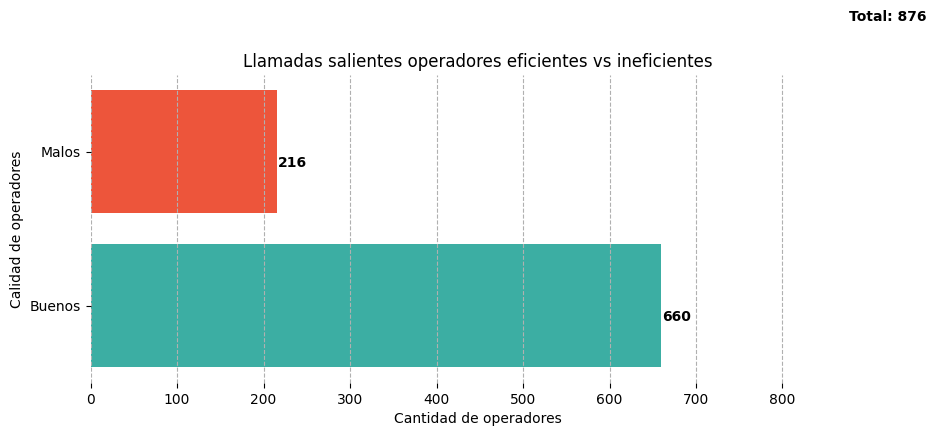

In [ ]:
# Definir los datos del gráfico
labels = ['Buenos', 'Malos']
values = [good_minus_bad, good_bad_counts['Malo']]
total = sum(values)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 4))

# Crear el gráfico de barras horizontales
bar_plot = ax.barh(labels, values, color=['#3CAEA3', '#ED553B'])

# Agregar los valores encima de cada barra
for i, v in enumerate(values):
    ax.text(v + 1, i - 0.1, str(v), color='black', fontweight='bold')

# Agregar el total al final
ax.text(total + 1, 1.85, f'Total: {total}', color='black', fontweight='bold')

# Establecer el título y los ejes
ax.set_title('Llamadas salientes operadores eficientes vs ineficientes')
ax.set_xlabel('Cantidad de operadores')
ax.set_ylabel('Calidad de operadores')

# Establecer los límites de los ejes
ax.set_xlim([0, total + 20])
ax.set_ylim([-0.5, 1.5])

# Ocultar los ejes
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Agregar el grid
ax.grid(axis='x', linestyle='--')

# Mostrar el gráfico
plt.show()

In [ ]:
data.head(2)

,usuario,data,direction,interna,operador,llamada_perdida,numero_llamadas,duracion_llamada,duracion_llamada_total,session_date,tiempo_espera,calidad_llamada,calidad_llamada_saliente
0,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,2019-08-05,5,Malo,Bueno
1,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,2019-08-05,1,Bueno,Bueno


- **Duración de llamada por operador** 

In [ ]:
data['duracion_llamada'].mean()

1010.9400110867417

In [ ]:
data['duracion_llamada'].describe()

count     41491.000000
mean       1010.940011
std        4066.666485
min           0.000000
25%           0.000000
50%         106.000000
75%         772.000000
max      144395.000000
Name: duracion_llamada, dtype: float64

- **Tiempo de espera de llamada por operador** 

In [ ]:
data['tiempo_espera'].describe()

count    41491.000000
mean       312.213227
std       1176.102940
min          0.000000
25%         19.000000
50%         60.000000
75%        219.000000
max      46474.000000
Name: tiempo_espera, dtype: float64

In [ ]:
# Crear columna indicando si el tiempo de espera es bueno o malo
data['calidad_tiempo'] = data['tiempo_espera'].apply(lambda x: 'Malo' if x > 219 else 'Bueno')

# Contabilizar cantidad de operadores buenos y malos
cantidad_calidad_tiempo = data.groupby('calidad_tiempo')['operador'].nunique()

# Restar operadores malos de los buenos
xy = cantidad_calidad_tiempo['Bueno'] - cantidad_calidad_tiempo['Malo']

# Imprimir resultados
print("Cantidad de operadores buenos: ", xy)
print("Cantidad de operadores malos: ", cantidad_calidad_tiempo['Malo'])

Cantidad de operadores buenos:  591
Cantidad de operadores malos:  474


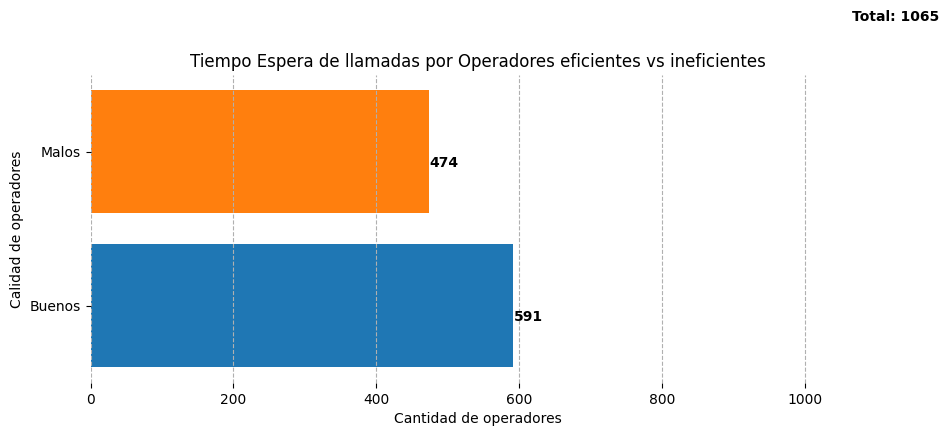

In [ ]:
# Definir los datos del gráfico
labels = ['Buenos', 'Malos']
values = [xy, cantidad_calidad_tiempo['Malo']]
total = sum(values)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 4))

# Crear el gráfico de barras horizontales
bar_plot = ax.barh(labels, values, color=['#1f77b4', '#ff7f0e'])

# Agregar los valores encima de cada barra
for i, v in enumerate(values):
    ax.text(v + 1, i - 0.1, str(v), color='black', fontweight='bold')

# Agregar el total al final
ax.text(total + 1, 1.85, f'Total: {total}', color='black', fontweight='bold')

# Establecer el título y los ejes
ax.set_title('Tiempo Espera de llamadas por Operadores eficientes vs ineficientes')
ax.set_xlabel('Cantidad de operadores')
ax.set_ylabel('Calidad de operadores')

# Establecer los límites de los ejes
ax.set_xlim([0, total + 20])
ax.set_ylim([-0.5, 1.5])

# Ocultar los ejes
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Agregar el grid
ax.grid(axis='x', linestyle='--')

# Mostrar el gráfico
plt.show()

In [ ]:
data.head(2)

,usuario,data,direction,interna,operador,llamada_perdida,numero_llamadas,duracion_llamada,duracion_llamada_total,session_date,tiempo_espera,calidad_llamada,calidad_llamada_saliente,calidad_tiempo
0,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,2019-08-05,5,Malo,Bueno,Bueno
1,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,2019-08-05,1,Bueno,Bueno,Bueno


- **Utiliza estos datos para dividir a los operadores en eficaz como ineficaces**

In [ ]:
def clasificar_operadores(df):
    # Crear una nueva columna para la calificación del operador
    df['calificacion_operador'] = ''
    
    # Recorrer el DataFrame
    for index, row in df.iterrows():
        # Obtener la calidad de la llamada, de la llamada saliente y del tiempo
        calidad_llamada = row['calidad_llamada']
        calidad_llamada_saliente = row['calidad_llamada_saliente']
        calidad_tiempo = row['calidad_tiempo']
        
        # Contar la cantidad de valores "buenos" en las tres columnas
        buenos = 0
        if calidad_llamada == 'Bueno':
            buenos += 1
        if calidad_llamada_saliente == 'Bueno':
            buenos += 1
        if calidad_tiempo == 'Bueno':
            buenos += 1
        
        # Asignar una categoría al operador en función de la cantidad de valores "buenos"
        if buenos == 3:
            df.at[index, 'calificacion_operador'] = 'Bueno'
        elif buenos == 2:
            df.at[index, 'calificacion_operador'] = 'Regular'
        else:
            df.at[index, 'calificacion_operador'] = 'Malo'
    
    return df


In [ ]:
df = clasificar_operadores(data)

In [ ]:
operadores_por_categoria = df.groupby(['calificacion_operador', 'operador']).size().reset_index(name='cantidad_operadores')
print(operadores_por_categoria)

     calificacion_operador  operador  cantidad_operadores
0                    Bueno  880020.0                   20
1                    Bueno  880240.0                   12
2                    Bueno  881278.0                    8
3                    Bueno  882476.0                    3
4                    Bueno  882680.0                   43
...                    ...       ...                  ...
1534               Regular  972408.0                    2
1535               Regular  972410.0                    1
1536               Regular  972412.0                    2
1537               Regular  972460.0                    1
1538               Regular  973120.0                    2

[1539 rows x 3 columns]


In [ ]:
df = clasificar_operadores(data)
operadores_por_categoria = df['calificacion_operador'].value_counts()
print(operadores_por_categoria)

Regular    22422
Bueno      12204
Malo        6865
Name: calificacion_operador, dtype: int64


In [ ]:
df = clasificar_operadores(data)
operadores_unicos_por_categoria = df.groupby('calificacion_operador')['operador'].nunique()
print(operadores_unicos_por_categoria)


calificacion_operador
Bueno      637
Malo       213
Regular    689
Name: operador, dtype: int64


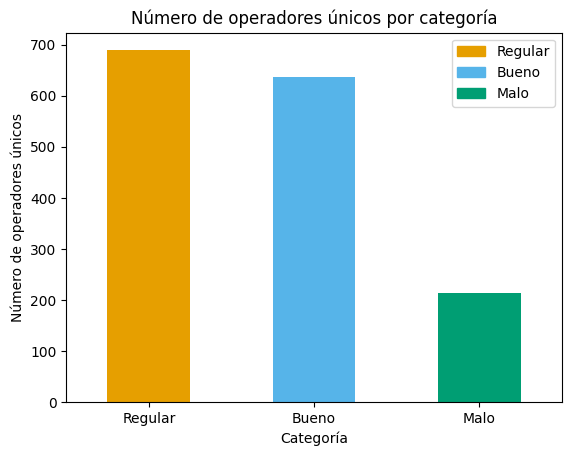

In [ ]:
df = clasificar_operadores(data)
operadores_unicos_por_categoria = df.groupby('calificacion_operador')['operador'].nunique()

operadores_unicos_por_categoria = operadores_unicos_por_categoria.sort_values(ascending=False)

colors = ['#E69F00', '#56B4E9', '#009E73']

fig, ax = plt.subplots()
operadores_unicos_por_categoria.plot(kind='bar', color=colors, ax=ax)

ax.set_title('Número de operadores únicos por categoría')
ax.set_xlabel('Categoría')
ax.set_ylabel('Número de operadores únicos')

plt.xticks(rotation=0)

legend_elements = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
ax.legend(legend_elements, operadores_unicos_por_categoria.index)

plt.show()

# Etapa 3 Prueba las hipótesis estadísticas

In [ ]:
df.head()

,usuario,data,direction,interna,operador,llamada_perdida,numero_llamadas,duracion_llamada,duracion_llamada_total,session_date,tiempo_espera,calidad_llamada,calidad_llamada_saliente,calidad_tiempo,calificacion_operador
0,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,2019-08-05,5,Malo,Bueno,Bueno,Regular
1,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,2019-08-05,1,Bueno,Bueno,Bueno,Bueno
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,2019-08-05,8,Bueno,Bueno,Bueno,Bueno
3,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,2019-08-05,25,Malo,Bueno,Bueno,Regular
4,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,False,2,3,29,2019-08-05,26,Bueno,Bueno,Bueno,Bueno


 - **Los operadores ineficaces tienen más llamadas perdidas que la media de los datos**

In [ ]:
promedio_llamadas_perdidas = df['llamada_perdida'].mean()
print(promedio_llamadas_perdidas)

0.34004964932153964


In [ ]:
df_malos = df[df['calificacion_operador'] == 'Malo']
promedio_llamadas_perdidas_malos = df_malos['llamada_perdida'].mean()
print(promedio_llamadas_perdidas_malos)

0.4295702840495266


 **Hipótesis nula H₀ = Los operadores ineficaces tienen menos o igual llamadas perdidas que la media de los datos**

 **Hipótesis alternativa, H₁ = Los operadores ineficaces tienen más llamadas perdidas que la media de los datos**



In [ ]:
Bueno = df.query('calificacion_operador == "Bueno"')
Malo = df.query('calificacion_operador == "Malo"')

In [ ]:
varianza_bueno = np.var(Bueno.llamada_perdida)
varianza_bueno 

0.18766377326732553

In [ ]:
varianza_malo = np.var(Malo.llamada_perdida)
varianza_malo 

0.24503965511113557

In [ ]:
Malo_va =  Malo.llamada_perdida
Bueno_va = Bueno.llamada_perdida

alpha = 0.05 

results_levene =st.levene(Malo_va.dropna(),Bueno_va.dropna()) 
print('p-value:', results_levene.pvalue)  

if (results_levene.pvalue < alpha):
    print("Rechazamos la hipótesis nula: las varianzas pueden considerarse diferentes")
else:
    print("No rechazamos la hipótesis nula: las varianzas pueden considerarse iguales")

p-value: 8.426698886870524e-147
Rechazamos la hipótesis nula: las varianzas pueden considerarse diferentes


In [ ]:
Malo_va =  Malo.llamada_perdida
Bueno_va = Bueno.llamada_perdida
alpha = 0.05 

results =st.ttest_ind(Malo_va, Bueno_va, equal_var = False, nan_policy='omit') 
print('p-value:', results.pvalue) 

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 1.5693257083570853e-135
Rechazamos la hipótesis nula


Formulamos la hipótesis alternativa al afirmar que si hay diferencia entre las llamadas perdidas en promedio de los operarios categorizados Malos que de los otros operarios. Utilizamos un nivel de significación de 0,05. Dado que el valor p es mayor que = 0,05, si podemos rechazar la hipótesis nula. La evidencia sugiere que existe una diferencia estadísticamente significativa entre los operarios Malos de los operarios Buenos, es decir, el promedio de llamadas perdidas es más alto que el de los operarios buenos.

# Etapa 4 Conclusión Final

- Cambiamos los formatos de las fechas de los distintos dataframe, para poder realizar nuestros análisis.

- Se eliminaron los datos NAN, para poder realizar este análisis.

- creamos 3 variables con las categorías 'Malo' y 'Bueno', para identificar si los operarios son ineficaces o no.

- creamos una función, con 3 categorías para identificar a los operadores si son Buenos, Regular o Malos.

- se concluyó que si hubo diferencias estadísticamente significativas en las proporciones de eventos debido a que en ambos casos, los grupos analizados con niveles de significación alfa de 0,05, fueron mayores que alfa, lo que indica que se rechaza la hipótesis nula que es  'Los operadores ineficaces tienen menos o igual llamadas perdidas que la media de los datos'.

- Tenemos 213 operadores ineficaces, después de todo nuestro análisis final.
